<a href="https://colab.research.google.com/github/jarek-pawlowski/machine-learning-applications/blob/main/preliminary_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminary problems
* some basic problems that are worth knowing and, by the way, an introduction to PyTorch library
* single perceptron, two coupled perceptrons, simplest deep model and the Universal Approximation Theorem

## Logic gates and Perceptrons
#### XOR issue

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

Let's start with training single perceptron model to simulate basic logic gates 

In [3]:
# define basic logic gates
X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float32)
gates = ("OR", "AND", "XOR")
# labels
Y_or = torch.tensor([0, 1, 1, 1], dtype=torch.float32).view(-1, 1)
Y_and = torch.tensor([0, 0, 0, 1], dtype=torch.float32).view(-1, 1)
Y_xor = torch.tensor([0, 1, 1, 0], dtype=torch.float32).view(-1, 1)

# let's define a model
class Perceptron(torch.nn.Module):    
    # constructor
    def __init__(self, size):
        super(Perceptron, self).__init__()
        self.single_neuron = nn.Linear(size, 1)
        self.sigmoid = nn.Sigmoid()
    # mathod called once the model is executed
    def forward(self, x):
        x = self.single_neuron(x)
        return self.sigmoid(x)

# define model and learnig scheme
model = Perceptron(size=2)
optimizer = optim.SGD(model.parameters(), lr=0.5)
MSE = nn.MSELoss()

# train
N_epochs = 10000

for gate, y_gt in zip(gates, (Y_and, Y_or, Y_xor)):
    train_loss = []
    model.train()  # turn on the training mode
    for _ in range(N_epochs):
        # this will zero out the gradients for this batch
        optimizer.zero_grad()
        # make predictions
        y_pred = model(X)
        # calculate the MSE loss
        loss = MSE(y_pred, y_gt)
        # backpropagate the loss
        loss.backward()
        # update the model weights (with assumed learning rate)
        optimizer.step()
        train_loss.append(loss.item())
    print("last loss value = ", train_loss[-1])
    model.eval()
    for i, x in enumerate(X):
        print("{} {} {} -> {}".format(x[0].item(), gate, x[1].item(), model(x).item()))
    print()


last loss value =  0.0009785083821043372
0.0 OR 0.0 -> 5.153506572241895e-05
0.0 OR 1.0 -> 0.03387916833162308
1.0 OR 0.0 -> 0.03387916833162308
1.0 OR 1.0 -> 0.9597753286361694

last loss value =  6.81646924931556e-05
0.0 AND 0.0 -> 0.010167200118303299
0.0 AND 1.0 -> 0.9908000826835632
1.0 AND 0.0 -> 0.9908000826835632
1.0 AND 1.0 -> 0.9999991655349731

last loss value =  0.2500559985637665
0.0 XOR 0.0 -> 0.010695069096982479
0.0 XOR 1.0 -> 0.9925585985183716
1.0 XOR 0.0 -> 0.9925585985183716
1.0 XOR 1.0 -> 0.9999994039535522



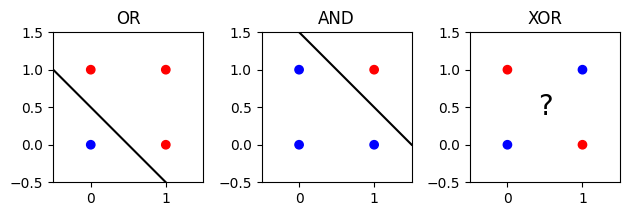

In [4]:
import matplotlib.pyplot as plt

for i, Y in enumerate([Y_or, Y_and, Y_xor]):
    ax = plt.subplot(131 + i)
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([-0.5, 1.5])
    ax.set_aspect('equal')

    plt.title(gates[i])
    plt.scatter(*zip(*X), c=Y, cmap='bwr')

    if i == 0:
        plt.plot([-0.5, 1], [1, -0.5], 'k')
    elif i == 1:
        plt.plot([0, 1.5], [1.5, 0], 'k')
    else:
        plt.text(0.5, 0.5, s="?", fontsize=20, ha='center', va='center')

plt.tight_layout()

- single perceptron is not able to capture XOR gate working

Now stack two perceptons and make the network deep

In [5]:
class PerceptronDeep(torch.nn.Module):    
    # constructor
    def __init__(self, hidden_size):
        super(PerceptronDeep, self).__init__()
        self.hidden_layer = nn.Linear(2, hidden_size)
        self.output_layer = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    # mathod called once the model is executed
    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.sigmoid(x)
        x = self.output_layer(x)
        return self.sigmoid(x)

# train
N_epochs = 100000

for gate, y_gt in zip(gates, (Y_or, Y_and, Y_xor)):
    # define model and learnig scheme
    model = PerceptronDeep(hidden_size=2)
    optimizer = optim.SGD(model.parameters(), lr=0.5)
    # start training
    train_loss = []
    model.train()  # turn on the training mode
    for _ in range(N_epochs):
        # this will zero out the gradients for this batch
        optimizer.zero_grad()
        # make predictions
        y_pred = model(X)
        # calculate the MSE loss
        loss = MSE(y_pred, y_gt)
        # backpropagate the loss
        loss.backward()
        # update the model weights (with assumed learning rate)
        optimizer.step()
        train_loss.append(loss.item())
    print("last loss value = ", train_loss[-1])
    model.eval()
    for i, x in enumerate(X):
        print("{} {} {} -> {}".format(x[0].item(), gate, x[1].item(), model(x).item()))
    print()

last loss value =  1.2850634448113851e-05
0.0 OR 0.0 -> 0.0050737070851027966
0.0 OR 1.0 -> 0.9964619278907776
1.0 OR 0.0 -> 0.9964659214019775
1.0 OR 1.0 -> 0.999193012714386

last loss value =  1.5237626939779148e-05
0.0 AND 0.0 -> 0.0001727753842715174
0.0 AND 1.0 -> 0.0038464698009192944
1.0 AND 0.0 -> 0.0038195238448679447
1.0 AND 1.0 -> 0.9943842887878418

last loss value =  5.1488561439327896e-05
0.0 XOR 0.0 -> 0.00803946703672409
0.0 XOR 1.0 -> 0.9931864738464355
1.0 XOR 0.0 -> 0.9931854009628296
1.0 XOR 1.0 -> 0.006960996426641941



- ... while the deep model is able to capture XOR gate.

## Simple regression and Universal Approximation Theorem

Let's get back to (flat) perceptron.
- before we begin, let's generate some complex function:

In [150]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

# define regression problem and generate synthetic data
X = torch.arange(-1.5, 1.5, 0.05).view(-1, 1).type(torch.float32)
y = torch.sin(X*7.)*torch.exp(X)/7.

r1, r2 = -1., 1.

dist_y = []

for i in range(5):
    noise = (0.01**0.5)*((r2 - r1)*torch.rand(60, 1) + r1)
    dist_y.append(y + noise)


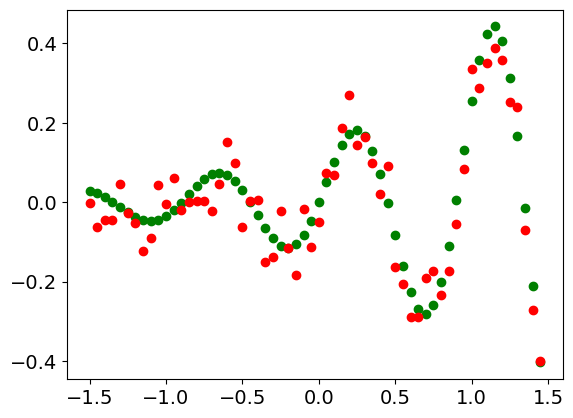

In [153]:
plt.scatter(X, y, c='g')
plt.scatter(X, dist_y[1], c='r')
plt.show()

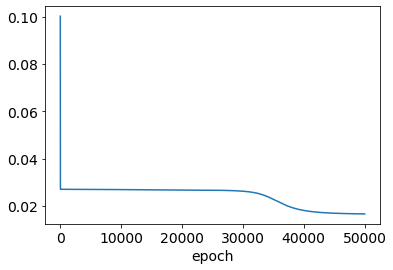

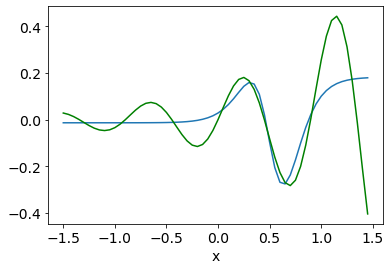

In [ ]:
class PerceptronDeep(torch.nn.Module):    
    # constructor
    def __init__(self, hidden_size):
        super(PerceptronDeep, self).__init__()
        self.hidden_layer = nn.Linear(1, hidden_size)
        self.output_layer = nn.Linear(hidden_size, 1)
        self.activation = nn.Tanh()  # Sigmoid has non-negative values
    # mathod called once the model is executed
    def forward(self, x):
        x = self.hidden_layer(x)
        x = self.activation(x)
        x = self.output_layer(x)
        return self.activation(x)

# narrow model
model = PerceptronDeep(hidden_size=2)

optimizer = optim.SGD(model.parameters(), lr=0.2)
MSE = nn.MSELoss()

# train
N_epochs = 50000
train_loss = []
model.train()  # turn on the training mode
for _ in range(N_epochs):
    # this will zero out the gradients for this batch
    optimizer.zero_grad()
    # make predictions
    y_pred = model(X)
    # calculate the MSE loss
    loss = MSE(y_pred, y)
    # backpropagate the loss
    loss.backward()
    # update the model weights (with assumed learning rate)
    optimizer.step()
    train_loss.append(loss.item())

plt.plot(train_loss)
plt.xlabel('epoch')
plt.show()

model.eval()
plt.plot(X.numpy(), model(X).detach().numpy())
plt.plot(X.numpy(), y.numpy(), 'g')
plt.xlabel('x')
plt.show()

- poor fit, model has too small capacity.

Do the same but with much wider model:

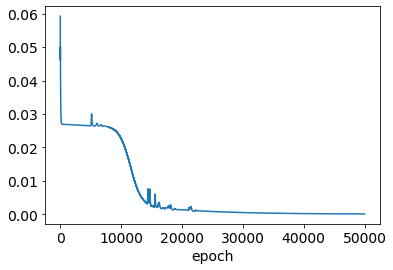

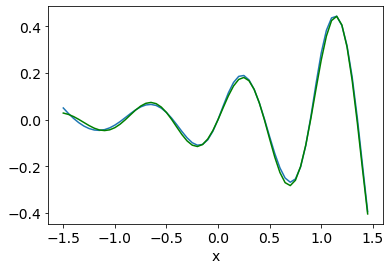

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# wider model
model = PerceptronDeep(hidden_size=20).to(device)
X, y = X.to(device), y.to(device)

# train
optimizer = optim.SGD(model.parameters(), lr=0.2)
N_epochs = 50000

train_loss = []
model.train()  # turn on the training mode
for _ in range(N_epochs):
    # this will zero out the gradients for this batch
    optimizer.zero_grad()
    # make predictions
    y_pred = model(X)
    # calculate the MSE loss
    loss = MSE(y_pred, y)
    # backpropagate the loss
    loss.backward()
    # update the model weights (with assumed learning rate)
    optimizer.step()
    train_loss.append(loss.item())

plt.plot(train_loss)
plt.xlabel('epoch')
plt.show()

model.eval()
plt.plot(X.cpu(), model(X).cpu().detach())
plt.plot(X.cpu(), y.cpu(), 'g')
plt.xlabel('x')
plt.show()

- quite nice fit, Universal Approximation Theorem holds.

Now, let's try with narrower but deeper model:

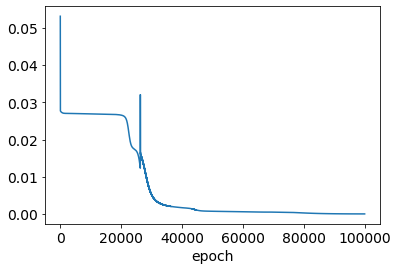

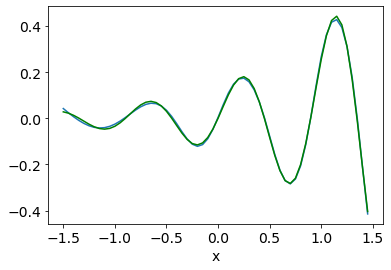

In [ ]:
class PerceptronDeeper(torch.nn.Module):    
    # constructor
    def __init__(self, hidden_size):
        super(PerceptronDeeper, self).__init__()
        self.hidden_layer_1st = nn.Linear(1, hidden_size)
        self.hidden_layer_2nd = nn.Linear(hidden_size, hidden_size)        
        self.output_layer = nn.Linear(hidden_size, 1)
        self.activation = nn.Tanh()  # Sigmoid has non-negative values
    # mathod called once the model is executed
    def forward(self, x):
        x = self.hidden_layer_1st(x)
        x = self.activation(x)
        x = self.hidden_layer_2nd(x)
        x = self.activation(x)
        x = self.output_layer(x)
        return self.activation(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X, y = X.to(device), y.to(device)

# narrow model
model = PerceptronDeeper(hidden_size=4).to(device)

optimizer = optim.SGD(model.parameters(), lr=0.2)
MSE = nn.MSELoss()

# train
N_epochs = 100000
train_loss = []
model.train()  # turn on the training mode
for _ in range(N_epochs):
    # this will zero out the gradients for this batch
    optimizer.zero_grad()
    # make predictions
    y_pred = model(X)
    # calculate the MSE loss
    loss = MSE(y_pred, y)
    # backpropagate the loss
    loss.backward()
    # update the model weights (with assumed learning rate)
    optimizer.step()
    train_loss.append(loss.item())

plt.plot(train_loss)
plt.xlabel('epoch')
plt.show()

model.eval()
plt.plot(X.cpu(), model(X).cpu().detach())
plt.plot(X.cpu(), y.cpu(), 'g')
plt.xlabel('x')
plt.show()

- deeper model with 12 units (3 layers each of 4 units) gives almost the same fit as the shalower but much wider model (1 layer of 20 units),
- deeper model (typically) takes longer to train.